<a href="https://colab.research.google.com/github/DivyaSadhana/PV-Supervised-ML/blob/main/Prediction_of_Hospitalization_rate_based_on_Age%2C_Vaccine_Manufacturer%2C_Number_of_days_for_event_Onset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
# Establish connection between My Drive and Google colab

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [83]:
# Import File

import pandas as pd
df = pd.read_excel(r'/content/gdrive/My Drive/2023_Master_Tracker.xlsx')
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,2547730,2023-01-01,DE,53.00,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,Coma,Computerised tomogram,Exposure to SARS-CoV-2,COVID19,JANSSEN,1808982,UNK,SYR,AR,COVID19 (COVID19 (JANSSEN))
1,2547730,2023-01-01,DE,53.00,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,Laboratory test,Magnetic resonance imaging,SARS-CoV-2 antibody test negative,COVID19,JANSSEN,1808982,UNK,SYR,AR,COVID19 (COVID19 (JANSSEN))
2,2547730,2023-01-01,DE,53.00,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,X-ray,NaN,NaN,COVID19,JANSSEN,1808982,UNK,SYR,AR,COVID19 (COVID19 (JANSSEN))
3,2547731,2023-01-01,MA,6.00,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,2547732,2023-01-01,MA,38.00,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,NaN,...,NaN,NaN,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155172,2717538,2023-11-24,CO,NaN,NaN,NaN,U,NaN,breast cancer; This spontaneous case was repor...,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,NaN,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
155173,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Fatigue,Gait inability,Lymphadenitis,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155174,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Pain in extremity,NaN,NaN,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155175,2624988,2023-05-02,WA,1.58,1.0,0.7,M,NaN,"Patient received monovalent vaccine on Friday,...",NaN,...,NaN,NaN,NaN,COVID19,MODERNA,AS1417B,1,IM,LL,COVID19 (COVID19 (MODERNA))


In [84]:
# Remove rows of the patients whose side effect onset data (NUMDAYS) is not available or null
df = df.dropna(subset=['NUMDAYS'])
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
3,2547731,2023-01-01,MA,6.00,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,2547732,2023-01-01,MA,38.00,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,NaN,...,NaN,NaN,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT))
5,2547733,2023-01-01,CA,63.00,63.0,NaN,M,NaN,Error: Dose in Series Given Too Early-,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,042h22a,1,IM,LA,COVID19 (COVID19 (MODERNA))
6,2547734,2023-01-01,IL,30.00,30.0,NaN,F,NaN,Systemic: EYE TWITCHING-Medium,NaN,...,NaN,NaN,NaN,TDAP,GLAXOSMITHKLINE BIOLOGICALS,KP547,1,IM,LA,TDAP (BOOSTRIX)
7,2547735,2023-01-01,LA,38.00,38.0,NaN,F,NaN,"Systemic: Confusion-Mild, Systemic: Fainting /...",NaN,...,Dysarthria,Syncope,Unresponsive to stimuli,COVID19-2,PFIZER\BIONTECH,GJ3274,NaN,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155169,2717532,2023-11-24,AL,30.00,30.0,NaN,F,NaN,she received Fluzone Quadrivalent and is curre...,NaN,...,NaN,NaN,NaN,FLU4,SANOFI PASTEUR,UT8144NA,UNK,OT,NaN,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT)
155173,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Fatigue,Gait inability,Lymphadenitis,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155174,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Pain in extremity,NaN,NaN,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155175,2624988,2023-05-02,WA,1.58,1.0,0.7,M,NaN,"Patient received monovalent vaccine on Friday,...",NaN,...,NaN,NaN,NaN,COVID19,MODERNA,AS1417B,1,IM,LL,COVID19 (COVID19 (MODERNA))


In [85]:
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                   float64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                       object
DATEDIED                   object
L_THREAT                   object
ER_VISIT                   object
HOSPITAL                   object
HOSPDAYS                  float64
X_STAY                     object
DISABLE                    object
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                   float64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

In [86]:
# Convert data type of NUMDAYS to Integer from Float
df = df.astype({"NUMDAYS": 'int'})
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                   float64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                       object
DATEDIED                   object
L_THREAT                   object
ER_VISIT                   object
HOSPITAL                   object
HOSPDAYS                  float64
X_STAY                     object
DISABLE                    object
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                     int64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

In [87]:
# Calculate Mean for NUMDAYS
mean_value = df['NUMDAYS'].mean()


# Calculate Median for NUMDAYS
median_value = df['NUMDAYS'].median()


# Calculate Mode for NUMDAYS
mode_value = df['NUMDAYS'].mode()

# Calculate Maximum Value
Maximum_Value = df['NUMDAYS'].max()

#Calculate Minimum Value
Minimum_Value = df['NUMDAYS'].min()

# Generate the Results to compare Mean, Median, Mode values

print(f"The mean of the NUMDAYS column is {mean_value}.")
print(f"The median of the NUMDAYS column is {median_value}.")
print(f"The mode of the NUMDAYS column is {mode_value}.")
print(f"The Maximum value of the NUMDAYS column is {Maximum_Value}.")
print(f"The Minimum value of the NUMDAYS column is {Minimum_Value}.")


The mean of the NUMDAYS column is 124.1281209751253.
The median of the NUMDAYS column is 2.0.
The mode of the NUMDAYS column is 0    0
Name: NUMDAYS, dtype: int64.
The Maximum value of the NUMDAYS column is 66108.
The Minimum value of the NUMDAYS column is 0.


In [88]:
Removal = df[ (df['NUMDAYS'] >= 31)].index
df.drop(Removal , inplace=True)
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
3,2547731,2023-01-01,MA,6.00,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,2547732,2023-01-01,MA,38.00,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,NaN,...,NaN,NaN,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT))
5,2547733,2023-01-01,CA,63.00,63.0,NaN,M,NaN,Error: Dose in Series Given Too Early-,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,042h22a,1,IM,LA,COVID19 (COVID19 (MODERNA))
6,2547734,2023-01-01,IL,30.00,30.0,NaN,F,NaN,Systemic: EYE TWITCHING-Medium,NaN,...,NaN,NaN,NaN,TDAP,GLAXOSMITHKLINE BIOLOGICALS,KP547,1,IM,LA,TDAP (BOOSTRIX)
7,2547735,2023-01-01,LA,38.00,38.0,NaN,F,NaN,"Systemic: Confusion-Mild, Systemic: Fainting /...",NaN,...,Dysarthria,Syncope,Unresponsive to stimuli,COVID19-2,PFIZER\BIONTECH,GJ3274,NaN,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155169,2717532,2023-11-24,AL,30.00,30.0,NaN,F,NaN,she received Fluzone Quadrivalent and is curre...,NaN,...,NaN,NaN,NaN,FLU4,SANOFI PASTEUR,UT8144NA,UNK,OT,NaN,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT)
155173,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Fatigue,Gait inability,Lymphadenitis,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155174,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Pain in extremity,NaN,NaN,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155175,2624988,2023-05-02,WA,1.58,1.0,0.7,M,NaN,"Patient received monovalent vaccine on Friday,...",NaN,...,NaN,NaN,NaN,COVID19,MODERNA,AS1417B,1,IM,LL,COVID19 (COVID19 (MODERNA))


In [89]:
# Calculate Mean, Median, Mode, Minimum, Maximum values to check execution of above logic
# Calculate Mean for NUMDAYS
Mean = df['NUMDAYS'].mean()


# Calculate Median for NUMDAYS
Median = df['NUMDAYS'].median()


# Calculate Mode for NUMDAYS
Mode = df['NUMDAYS'].mode()

# Calculate Maximum Value
Maximum = df['NUMDAYS'].max()

#Calculate Minimum Value
Minimum = df['NUMDAYS'].min()

# Generate the Results to compare Mean, Median, Mode values

print(f"The mean of the NUMDAYS column is {Mean}.")
print(f"The median of the NUMDAYS column is {Median}.")
print(f"The mode of the NUMDAYS column is {Mode}.")
print(f"The Maximum value of the NUMDAYS column is {Maximum}.")
print(f"The Minimum value of the NUMDAYS column is {Minimum}.")

The mean of the NUMDAYS column is 2.289135008043559.
The median of the NUMDAYS column is 0.0.
The mode of the NUMDAYS column is 0    0
Name: NUMDAYS, dtype: int64.
The Maximum value of the NUMDAYS column is 30.
The Minimum value of the NUMDAYS column is 0.


In [90]:
# Remove null values of 'Age' column as the number of rows are not larger .
# Mean should be used for normal distributed data if the missing values are higher than available data.
# Median should be used if data is skewed towards left or right and missing values are high
df = df.dropna(subset=['AGE_YRS'])
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
3,2547731,2023-01-01,MA,6.00,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,2547732,2023-01-01,MA,38.00,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,NaN,...,NaN,NaN,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT))
5,2547733,2023-01-01,CA,63.00,63.0,NaN,M,NaN,Error: Dose in Series Given Too Early-,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,042h22a,1,IM,LA,COVID19 (COVID19 (MODERNA))
6,2547734,2023-01-01,IL,30.00,30.0,NaN,F,NaN,Systemic: EYE TWITCHING-Medium,NaN,...,NaN,NaN,NaN,TDAP,GLAXOSMITHKLINE BIOLOGICALS,KP547,1,IM,LA,TDAP (BOOSTRIX)
7,2547735,2023-01-01,LA,38.00,38.0,NaN,F,NaN,"Systemic: Confusion-Mild, Systemic: Fainting /...",NaN,...,Dysarthria,Syncope,Unresponsive to stimuli,COVID19-2,PFIZER\BIONTECH,GJ3274,NaN,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155169,2717532,2023-11-24,AL,30.00,30.0,NaN,F,NaN,she received Fluzone Quadrivalent and is curre...,NaN,...,NaN,NaN,NaN,FLU4,SANOFI PASTEUR,UT8144NA,UNK,OT,NaN,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT)
155173,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Fatigue,Gait inability,Lymphadenitis,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155174,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Pain in extremity,NaN,NaN,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155175,2624988,2023-05-02,WA,1.58,1.0,0.7,M,NaN,"Patient received monovalent vaccine on Friday,...",NaN,...,NaN,NaN,NaN,COVID19,MODERNA,AS1417B,1,IM,LL,COVID19 (COVID19 (MODERNA))


In [ ]:
# Convert Age Data Type from Float to Integer

In [91]:
df = df.astype({"AGE_YRS": 'int'})
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                     int64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                       object
DATEDIED                   object
L_THREAT                   object
ER_VISIT                   object
HOSPITAL                   object
HOSPDAYS                  float64
X_STAY                     object
DISABLE                    object
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                     int64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

# Change data type for 'Died' column : Replace 'Y' with 1 and Fill/Rename 'Null/Missing values' with 0

In [92]:
DIED = df['DIED'].fillna(0)
print(DIED)

3         0
4         0
5         0
6         0
7         0
         ..
155169    0
155173    0
155174    0
155175    0
155176    0
Name: DIED, Length: 75781, dtype: object


In [93]:
df['DIED']= DIED
df.head(2)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
3,2547731,2023-01-01,MA,6,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,0,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,2547732,2023-01-01,MA,38,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,0,...,NaN,NaN,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT))


In [94]:
df['DIED'] = df['DIED'].replace('Y', 1)
print(df['DIED'])

3         0
4         0
5         0
6         0
7         0
         ..
155169    0
155173    0
155174    0
155175    0
155176    0
Name: DIED, Length: 75781, dtype: int64


# Change data type for 'Life_Threat' Column : Replace 'Y' with 1 and Fill/Rename 'Null/Missing values' with 0

In [95]:
df['L_THREAT'] = df['L_THREAT'].replace('Y', 1)
print(df['L_THREAT'])

3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
          ..
155169   NaN
155173   NaN
155174   NaN
155175   NaN
155176   NaN
Name: L_THREAT, Length: 75781, dtype: float64


In [96]:
df['L_THREAT'] = df['L_THREAT'].fillna(0)
print(df['L_THREAT'])

3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
         ... 
155169    0.0
155173    0.0
155174    0.0
155175    0.0
155176    0.0
Name: L_THREAT, Length: 75781, dtype: float64


In [97]:
df = df.astype({"L_THREAT": 'int'})
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                     int64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                        int64
DATEDIED                   object
L_THREAT                    int64
ER_VISIT                   object
HOSPITAL                   object
HOSPDAYS                  float64
X_STAY                     object
DISABLE                    object
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                     int64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

# Change data type for 'Hospital' column : Replace 'Y' with 1 and Fill/Rename 'Null/Missing values' with 0

In [98]:
df['HOSPITAL'] = df['HOSPITAL'].replace('Y', 1)
print(df['HOSPITAL'])

3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
          ..
155169   NaN
155173   NaN
155174   NaN
155175   NaN
155176   NaN
Name: HOSPITAL, Length: 75781, dtype: float64


In [99]:
df['HOSPITAL'] = df['HOSPITAL'].fillna(0)
print(df['HOSPITAL'])

3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
         ... 
155169    0.0
155173    0.0
155174    0.0
155175    0.0
155176    0.0
Name: HOSPITAL, Length: 75781, dtype: float64


In [100]:
df = df.astype({"HOSPITAL": 'int'})
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                     int64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                        int64
DATEDIED                   object
L_THREAT                    int64
ER_VISIT                   object
HOSPITAL                    int64
HOSPDAYS                  float64
X_STAY                     object
DISABLE                    object
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                     int64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

# Change data type for'Disability' Column: Replace 'Y' with 1 and Fill/Rename 'Null/Missing values' with 0

In [101]:
df['DISABLE'] = df['DISABLE'].replace('Y', 1)
print(df['DISABLE'])

3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
          ..
155169   NaN
155173   NaN
155174   NaN
155175   NaN
155176   NaN
Name: DISABLE, Length: 75781, dtype: float64


In [102]:

df['DISABLE'] = df['DISABLE'].fillna(0)
print(df['DISABLE'])

3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
         ... 
155169    0.0
155173    0.0
155174    0.0
155175    0.0
155176    0.0
Name: DISABLE, Length: 75781, dtype: float64


In [103]:
df = df.astype({"DISABLE": 'int'})
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                     int64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                        int64
DATEDIED                   object
L_THREAT                    int64
ER_VISIT                   object
HOSPITAL                    int64
HOSPDAYS                  float64
X_STAY                     object
DISABLE                     int64
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                     int64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

# Pick only required columns by excluding unwanted columns

In [104]:
Required_Data = df[['AGE_YRS','SEX','DIED','HOSPITAL','L_THREAT','DISABLE','NUMDAYS','VAX_MANU','VAX_ROUTE','VAX_SITE']]
Required_Data.head()

,AGE_YRS,SEX,DIED,HOSPITAL,L_THREAT,DISABLE,NUMDAYS,VAX_MANU,VAX_ROUTE,VAX_SITE
3,6,M,0,0,0,0,0,PFIZER\BIONTECH,IM,LA
4,38,F,0,0,0,0,0,MODERNA,IM,LA
5,63,M,0,0,0,0,0,MODERNA,IM,LA
6,30,F,0,0,0,0,0,GLAXOSMITHKLINE BIOLOGICALS,IM,LA
7,38,F,0,0,0,0,0,PFIZER\BIONTECH,IM,LA


#Perform Encoding, remove null values to execute correlation

df.corr() computes the pairwise correlation of columns, excluding NA/null values. The resulting correlation matrix is a DataFrame where each cell represents the correlation coefficient between two variables.

# Perform Correlation for Feature Selection

<ipython-input-105-f115fd784441>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Required_Data.corr()


           AGE_YRS      DIED  HOSPITAL  L_THREAT   DISABLE   NUMDAYS
AGE_YRS   1.000000  0.068411  0.133026  0.047200  0.067781  0.143557
DIED      0.068411  1.000000  0.112579  0.067423  0.006042  0.076783
HOSPITAL  0.133026  0.112579  1.000000  0.402984  0.212870  0.320035
L_THREAT  0.047200  0.067423  0.402984  1.000000  0.246601  0.123703
DISABLE   0.067781  0.006042  0.212870  0.246601  1.000000  0.175020
NUMDAYS   0.143557  0.076783  0.320035  0.123703  0.175020  1.000000


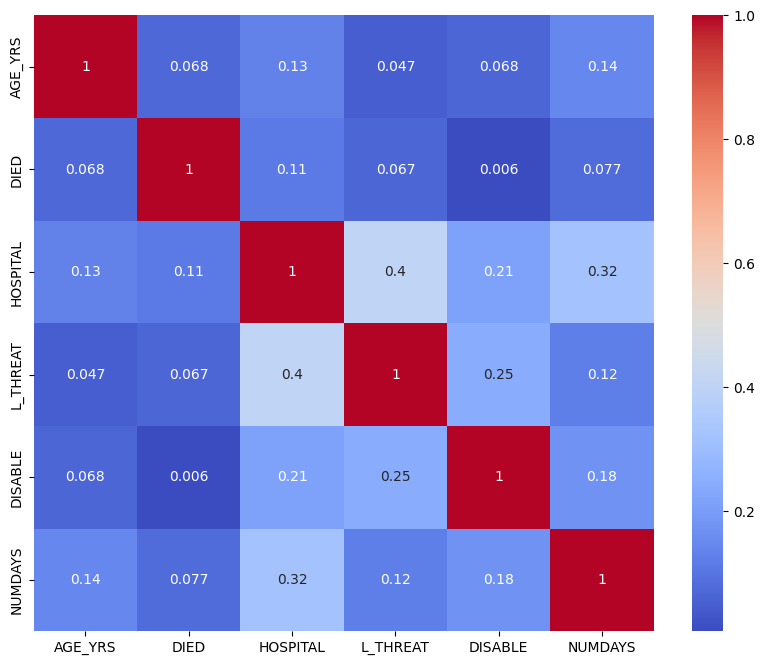

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Required_Data is your DataFrame
correlation_matrix = Required_Data.corr()

# Display the correlation matrix
print(correlation_matrix)

# If you want to visualize this correlation matrix, you can use seaborn's heatmap function:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The output you’re seeing is a correlation matrix. It’s a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, it means they might have a strong relationship and change together.

Here’s what each value in your matrix means:

1.000000: A diagonal line from the top left to the bottom right is filled with 1.00, which indicates that a variable always perfectly correlates with itself.
Positive values: For example, AGE_YRS and NUMDAYS have a correlation of 0.143557. This means that there’s a positive correlation between these two variables. As AGE_YRS increases, NUMDAYS also increases.
Negative values: If you had any negative values, it would indicate a negative correlation i.e., one variable increases as the other decreases.
The FutureWarning is a warning message from pandas library about a future change in the default behavior of the corr function. Currently, the numeric_only parameter defaults to None, but in a future version of pandas, it will default to False. To avoid this warning, you can explicitly set numeric_only=True or numeric_only=False when calling the corr function. For example: correlation_matrix = Required_Data.corr(numeric_only=True). This will silence the warning.

Please note that correlation does not imply causation. Just because two variables correlate does not mean that one causes the other to change. It’s also important to remember that correlation measures linear relationships and might miss out on other types of relationships.

# Implement One hot encoding for Vaccine Manufacturer to establish correlation betwen features

In [106]:
Modified_Data = df[['AGE_YRS','DIED','L_THREAT','DISABLE','NUMDAYS','VAX_MANU','HOSPITAL']]
Modified_Data.head()

,AGE_YRS,DIED,L_THREAT,DISABLE,NUMDAYS,VAX_MANU,HOSPITAL
3,6,0,0,0,0,PFIZER\BIONTECH,0
4,38,0,0,0,0,MODERNA,0
5,63,0,0,0,0,MODERNA,0
6,30,0,0,0,0,GLAXOSMITHKLINE BIOLOGICALS,0
7,38,0,0,0,0,PFIZER\BIONTECH,0


In [107]:
counts = Modified_Data.HOSPITAL.value_counts()
print(counts)

0    69397
1     6384
Name: HOSPITAL, dtype: int64


In [108]:
count_zero = (Modified_Data.DIED == 0).sum()
count_one = (Modified_Data.DIED == 1).sum()

print(f"Count of 0: {count_zero}")
print(f"Count of 1: {count_one}")


Count of 0: 75144
Count of 1: 637


In [109]:
count_zero = (Modified_Data.L_THREAT == 0).sum()
count_one = (Modified_Data.L_THREAT == 1).sum()

print(f"Count of 0: {count_zero}")
print(f"Count of 1: {count_one}")

Count of 0: 73803
Count of 1: 1978


In [110]:
count_zero = (Modified_Data.DISABLE == 0).sum()
count_one = (Modified_Data.DISABLE == 1).sum()

print(f"Count of 0: {count_zero}")
print(f"Count of 1: {count_one}")

Count of 0: 72197
Count of 1: 3584


Apply One hot encoding

In [111]:
# Import the necessary library
import pandas as pd

# Assuming Modified_Data is your DataFrame and 'Vaccine_Manufacturer' is the column to be encoded
Final_Data_encoded = pd.get_dummies(Modified_Data, columns=['VAX_MANU'])

# Now, Final_Data_encoded will have the one-hot encoded features of 'Vaccine_Manufacturer'
print(Final_Data_encoded.head())

   AGE_YRS  DIED  L_THREAT  DISABLE  NUMDAYS  HOSPITAL  \
3        6     0         0        0        0         0   
4       38     0         0        0        0         0   
5       63     0         0        0        0         0   
6       30     0         0        0        0         0   
7       38     0         0        0        0         0   

   VAX_MANU_BAVARIAN NORDIC  VAX_MANU_BERNA BIOTECH, LTD.  \
3                         0                             0   
4                         0                             0   
5                         0                             0   
6                         0                             0   
7                         0                             0   

   VAX_MANU_CSL LIMITED  VAX_MANU_DYNAVAX TECHNOLOGIES CORPORATION  ...  \
3                     0                                          0  ...   
4                     0                                          0  ...   
5                     0                                    

Establish Correlation with Vaccine Manufacturer

                                             AGE_YRS      DIED  L_THREAT  \
AGE_YRS                                     1.000000  0.068411  0.047200   
DIED                                        0.068411  1.000000  0.067423   
L_THREAT                                    0.047200  0.067423  1.000000   
DISABLE                                     0.067781  0.006042  0.246601   
NUMDAYS                                     0.143557  0.076783  0.123703   
HOSPITAL                                    0.133026  0.112579  0.402984   
VAX_MANU_BAVARIAN NORDIC                   -0.001115  0.001869 -0.005900   
VAX_MANU_BERNA BIOTECH, LTD.               -0.002663 -0.001673 -0.002974   
VAX_MANU_CSL LIMITED                        0.001766 -0.000334 -0.000595   
VAX_MANU_DYNAVAX TECHNOLOGIES CORPORATION  -0.011221 -0.004991 -0.008874   
VAX_MANU_EMERGENT BIOSOLUTIONS             -0.013820 -0.002917  0.002657   
VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS        0.005707 -0.021952 -0.034927   
VAX_MANU_INT

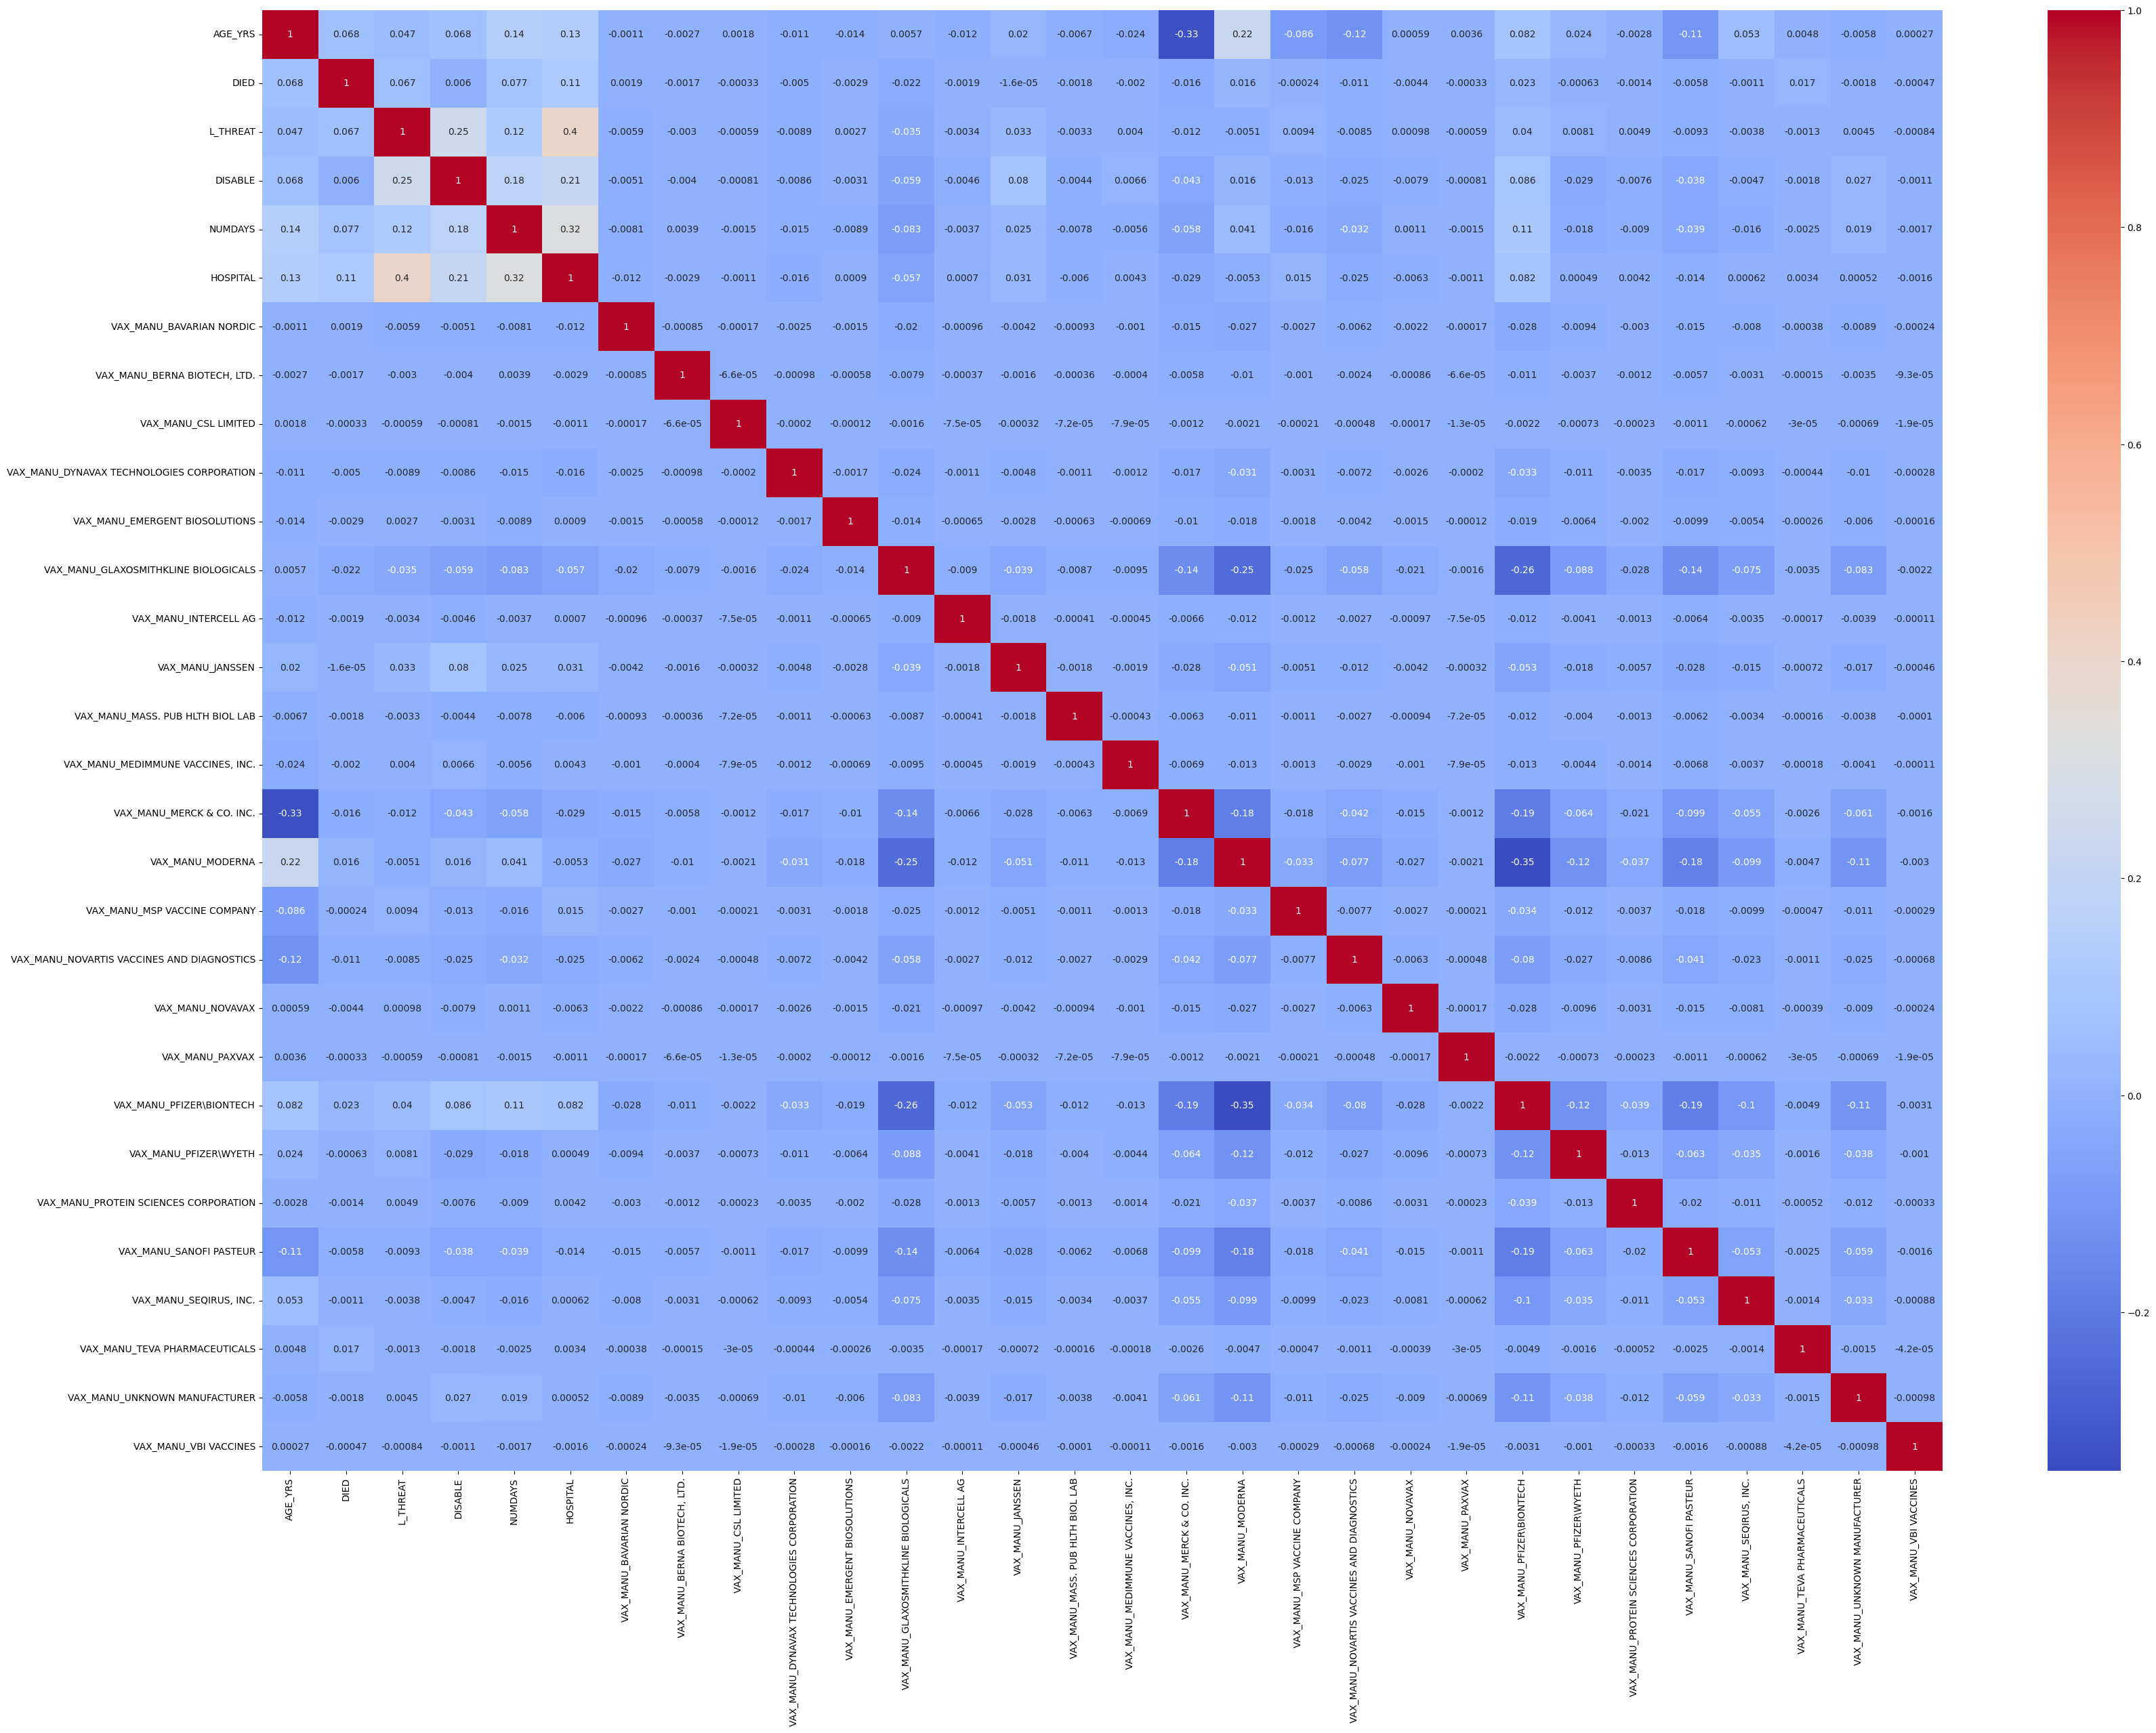

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Final_Data_encoded is your DataFrame
correlation_matrix = Final_Data_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# If you want to visualize this correlation matrix, you can use seaborn's heatmap function:
plt.figure(figsize=(40,28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
AGE_YRS and DIED: The correlation coefficient is 0.068411, which indicates a weak positive relationship. As AGE_YRS increases, DIED also tends to increase slightly.
AGE_YRS and HOSPITAL: The correlation coefficient is 0.133026, which indicates a weak positive relationship. As AGE_YRS increases, HOSPITAL also tends to increase slightly.
DIED and HOSPITAL: The correlation coefficient is 0.112579, which indicates a weak positive relationship. As DIED increases, HOSPITAL also tends to increase slightly.
AGE_YRS and VAX_MANU_MERCK & CO. INC.: The correlation coefficient is -0.331726, which indicates a moderate negative relationship. As AGE_YRS increases, VAX_MANU_MERCK & CO. INC. tends to decrease.

In [113]:
Final_Data = Final_Data_encoded.drop(['DIED','L_THREAT','DISABLE'], axis=1)
Final_Data.head()

,AGE_YRS,NUMDAYS,HOSPITAL,VAX_MANU_BAVARIAN NORDIC,"VAX_MANU_BERNA BIOTECH, LTD.",VAX_MANU_CSL LIMITED,VAX_MANU_DYNAVAX TECHNOLOGIES CORPORATION,VAX_MANU_EMERGENT BIOSOLUTIONS,VAX_MANU_GLAXOSMITHKLINE BIOLOGICALS,VAX_MANU_INTERCELL AG,...,VAX_MANU_NOVAVAX,VAX_MANU_PAXVAX,VAX_MANU_PFIZER\BIONTECH,VAX_MANU_PFIZER\WYETH,VAX_MANU_PROTEIN SCIENCES CORPORATION,VAX_MANU_SANOFI PASTEUR,"VAX_MANU_SEQIRUS, INC.",VAX_MANU_TEVA PHARMACEUTICALS,VAX_MANU_UNKNOWN MANUFACTURER,VAX_MANU_VBI VACCINES
3,6,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,63,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,30,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,38,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#Model 1

In [ ]:
# Yes, the provided code does perform hyperparameter tuning. It uses GridSearchCV from sklearn.model_selection, which is a method for performing hyperparameter tuning in order to determine the optimal hyperparameters for a model.

In this code, GridSearchCV is used to find the best max_depth, min_samples_split, and min_samples_leaf for the DecisionTreeClassifier. It does this by fitting the model with each combination of parameters, and then selecting the combination that resulted in the highest accuracy.

So, in summary, this code is a good example of hyperparameter tuning in machine learning. It’s a crucial step in model selection to improve the model’s performance.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

# Assuming Final_Data_encoded is your DataFrame
X = Final_Data_encoded.drop('HOSPITAL', axis=1)  # Features (all columns except 'HOSPITAL')
y = Final_Data_encoded['HOSPITAL']   # Target ('HOSPITAL' column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Training cases: %d\nTest cases: %d' % (X_train.shape[0],X_test.shape[0]))

# Create a decision tree classifier with Gini impurity and fit it to the training data
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

# Create a decision tree classifier with entropy and fit it to the training data
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Calculate the accuracy and precision of the model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini, average='weighted')  # Use 'weighted' for multi-class classification

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy, average='weighted')  # Use 'weighted' for multi-class classification

print(f"Gini Accuracy: {accuracy_gini}")
print(f"Gini Precision: {precision_gini}")

print(f"Entropy Accuracy: {accuracy_entropy}")
print(f"Entropy Precision: {precision_entropy}")

# Calculate and print the confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

print(f"Gini Confusion Matrix: \n{cm_gini}")
print(f"Entropy Confusion Matrix: \n{cm_entropy}")


Training cases: 60624
Test cases: 15157
Gini Accuracy: 0.9553341690308108
Gini Precision: 0.9522082692737951
Entropy Accuracy: 0.9547403839809989
Entropy Precision: 0.9515107714303691
Gini Confusion Matrix: 
[[13690   190]
 [  487   790]]
Entropy Confusion Matrix: 
[[13688   192]
 [  494   783]]


In [ ]:
predictions_gini = clf_gini.predict(X_test)
print('Predicted labels: ', predictions_gini)
print('Actual labels:    ' ,y_test)

from sklearn. metrics import classification_report

print(classification_report(y_test, predictions_gini))

Predicted labels:  [0 0 1 ... 0 0 1]
Actual labels:     12637     0
92661     1
40073     1
144281    0
95198     0
         ..
24790     0
73965     0
142766    0
137661    0
96988     1
Name: HOSPITAL, Length: 15157, dtype: int64
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13880
           1       0.81      0.62      0.70      1277

    accuracy                           0.96     15157
   macro avg       0.89      0.80      0.84     15157
weighted avg       0.95      0.96      0.95     15157



In [ ]:
features = Final_Data_encoded.drop('HOSPITAL', axis=1)
label = Final_Data_encoded['HOSPITAL']

X,y = features.values, label.values

for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 2 
  Features: [38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 3 
  Features: [63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 4 
  Features: [30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0
Patient 5 
  Features: [38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
  Label: 0


In [ ]:
Model = clf_gini.fit(X, y)
Model.score(X, y)

0.9709425845528562

In [ ]:
import numpy as np

# Assuming 'sample' is your input data with 25 features
Model = np.array([38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1)

# Now you can make a prediction
prediction_gini = clf_gini.predict(Model)
prediction_entropy = clf_entropy.predict(Model)

print(f"Gini Prediction: {prediction_gini}")
print(f"Entropy Prediction: {prediction_entropy}")


Gini Prediction: [0]
Entropy Prediction: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Model 2:- Model 2 with Hyper-parameter Tuning and Training Vs Test ratio of 60: 40

In [ ]:
This code will perform a grid search over the specified parameter grid for a DecisionTreeClassifier wrapped in a MultiOutputClassifier. The best parameters found by the grid search will be used to fit a new MultiOutputClassifier to the training data. The accuracy and precision of the model will be calculated for each label separately.

In [ ]:
This code will train a separate DecisionTreeClassifier for each label in your data, and it will calculate the accuracy and precision for each label separately.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV

# Assuming Final_Data_encoded is your DataFrame
A = Final_Data_encoded.drop('HOSPITAL', axis=1)  # Features (all columns except 'HOSPITAL')
Z = Final_Data_encoded['HOSPITAL']   # Target ('HOSPITAL' column)

# Split the data into training and testing sets
A_train, A_test, Z_train, Z_test = train_test_split(A, Z, test_size=0.4, random_state=42, stratify=Z)
print('Training cases: %d\nTest cases: %d' % (A_train.shape[0], A_test.shape[0]))

# Create a decision tree classifier
clf_gini = DecisionTreeClassifier(criterion='gini')

# Define the parameter values that should be searched
max_depth_values = list(range(1, 51))
min_samples_split_values = list(range(2, 11))
min_samples_leaf_values = list(range(1, 11))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=max_depth_values, min_samples_split=min_samples_split_values, min_samples_leaf=min_samples_leaf_values)

# Instantiate the grid with KFold cross-validation
grid = GridSearchCV(clf_gini, param_grid, cv=KFold(10), scoring='accuracy')

# Fit the grid with data
grid.fit(A_train, Z_train)

# View the complete results
grid.cv_results_

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

# Use the best parameters to fit the model
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=grid.best_params_['max_depth'], min_samples_split=grid.best_params_['min_samples_split'], min_samples_leaf=grid.best_params_['min_samples_leaf'])
clf_gini.fit(A_train, Z_train)

# Make predictions on the testing set
y_pred_gini = clf_gini.predict(A_test)

# Calculate the accuracy and precision of the model
accuracy_gini = accuracy_score(Z_test, y_pred_gini)
precision_gini = precision_score(Z_test, y_pred_gini, average='weighted')  # Use 'weighted' for multi-class classification

print(f"Gini Accuracy: {accuracy_gini}")
print(f"Gini Precision: {precision_gini}")

# Calculate and print the confusion matrix
cm_gini = confusion_matrix(Z_test, y_pred_gini)

print(f"Gini Confusion Matrix: \n{cm_gini}")


Training cases: 45468
Test cases: 30313


In [ ]:
# Make predictions on the testing set
predictions_gini = clf_gini.predict(A_test)
print('Predicted labels: ', predictions_gini)
print('Actual labels:    ' ,Z_test)

from sklearn.metrics import classification_report

print(classification_report(Z_test, predictions_gini))

In [ ]:

features = Final_Data_encoded['HOSPITAL'].values.reshape(-1, 1)

#Define Label
vax_manu_columns = [col for col in Final_Data_encoded.columns if 'VAX_MANU' in col]

label = Final_Data_encoded[['AGE_YRS', 'NUMDAYS'] + vax_manu_columns]

Z,A = Final_Data_encoded[features].values,Final_Data_encoded[label].values

for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:",list(Z[n]), "\n  Label:", A[n])

In [ ]:
Final_Model = clf_gini.fit(Z,A)
Final_Model.score(Z,A)

In [ ]:
import numpy as np

# Assuming 'sample' is your input data with 25 features
Final_Model = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1)

# Now you can make a prediction
prediction_gini = clf_gini.predict(Final_Model)
prediction_entropy = clf_entropy.predict(Final_Model)

print(f"Gini Prediction: {prediction_gini}")
print(f"Entropy Prediction: {prediction_entropy}")